# DISASTER ANALYSIS

### Aim
The data contains global information about different disasters spanning across 5 decades (1970-2020) in different regions, countries, continents. 
The aim for selecting this data is to analyze which disasers are most frequent, which areas are more affected by the disasters, what is the death poll caused by each disaster, analysis on the recurring damages, etc. This analysis can help in understanding the frequency  and occurrence of disasters as per different geographical locations and thus availing the option to take preventive measures.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd

In [2]:
#reading csv file/raw data
disaster_data = pd.read_csv('disaster_data.csv')

In [3]:
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Event                            12141 non-null  object 
 8   Country                          14644 non-null  object 
 9   ISO                              14644 non-null  object 
 10  Region                           14644 non-null  object 
 11  Continent                        14644 non-null  object 
 12  Location          

In [5]:
#data cleansing by dropping irrelevant columns
disaster = disaster_data.drop(columns = 
['Glide','Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
 'Dis Mag Value', 'Start Day', 'End Day', 'No Injured', 'No Homeless', 'No Affected', "Reconstruction Costs ('000 US$)", "Insured Damages ('000 US$)",
 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Adm Level', 'Admin1 Code', 'Admin2 Code','Geo Locations'])

In [6]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             14644 non-null  object 
 1   Year               14644 non-null  int64  
 2   Seq                14644 non-null  int64  
 3   Disaster Group     14644 non-null  object 
 4   Disaster Subgroup  14644 non-null  object 
 5   Disaster Type      14644 non-null  object 
 6   Event              12141 non-null  object 
 7   Country            14644 non-null  object 
 8   ISO                14644 non-null  object 
 9   Region             14644 non-null  object 
 10  Continent          14644 non-null  object 
 11  Location           13298 non-null  object 
 12  Dis Mag Scale      13571 non-null  object 
 13  Start Year         14644 non-null  int64  
 14  Start Month        14376 non-null  float64
 15  End Year           14644 non-null  int64  
 16  End Month          140

In [7]:
#data transformation by dropping NaN values from required columns
disaster = disaster.dropna(subset = ['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Event', 'Country', 'ISO',
                'Region', 'Continent', 'Location', 'Dis Mag Scale', 'Start Year', 'Start Month', 'End Year', 'End Month',
                'Total Deaths', 'Total Affected', 'CPI'])

In [8]:
#data transformation by filling in the missing/NaN values for data integrity
disaster = disaster.fillna({'Total Damages': 0})

In [9]:
disaster

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Event,Country,ISO,Region,...,Location,Dis Mag Scale,Start Year,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages,CPI
3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,...,"Khulna, Chittagong",Kph,1970,11.0,1970,11.0,300000.0,3648000.0,86400.0,15.001282
14,1970-0090-CHN,1970,90,Natural,Meteorological,Storm,Tropical cycloneFran,China,CHN,Eastern Asia,...,"Yang-Mei (Tao-Yuan), Wu-F Eng (Hsin-Chu), Yang...",Kph,1970,9.0,1970,9.0,107.0,14000.0,0.0,15.001282
25,1970-0067-ECU,1970,67,Natural,Geophysical,Earthquake,Ground movement,Ecuador,ECU,South America,...,Loja province,Richter,1970,12.0,1970,12.0,29.0,88112.0,4000.0,15.001282
38,1970-0112-IND,1970,112,Natural,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,...,Broach,Richter,1970,3.0,1970,3.0,26.0,200.0,0.0,15.001282
39,1971-0042-CHL,1971,42,Natural,Geophysical,Earthquake,Ground movement,Chile,CHL,South America,...,"Valparaiso, Salamnca, Coquimbo",Richter,1971,7.0,1971,7.0,85.0,2348973.0,236400.0,15.645257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,2020-0132-VUT,2020,132,Natural,Meteorological,Storm,Tropical cycloneCyclone 'Harold',Vanuatu,VUT,Melanesia,...,"Pentecost, Espiritu Santo, Penama, Sanma, Mal...",Kph,2020,4.0,2020,4.0,5.0,83837.0,0.0,100.000000
14576,2020-0168-YEM,2020,168,Natural,Hydrological,Flood,Flash flood,Yemen,YEM,Western Asia,...,"Aden, Lahj, Taiz, Ad Dali’, Abyan, Hadramawt g...",Km2,2020,4.0,2020,4.0,10.0,150030.0,10000.0,100.000000
14580,2020-0050-ZAF,2020,50,Natural,Hydrological,Flood,Flash flood,South Africa,ZAF,Southern Africa,...,Johannesburg and Gauteng Province,Km2,2020,2.0,2020,2.0,3.0,200.0,0.0,100.000000
14581,2020-0419-COD,2020,419,Natural,Hydrological,Flood,Riverine flood,Congo (the Democratic Republic of the),COD,Middle Africa,...,"Sake Town (Masisi territory, North Kivu Provin...",Km2,2020,10.0,2020,10.0,13.0,35422.0,0.0,100.000000


In [10]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5783 entries, 3 to 14589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             5783 non-null   object 
 1   Year               5783 non-null   int64  
 2   Seq                5783 non-null   int64  
 3   Disaster Group     5783 non-null   object 
 4   Disaster Subgroup  5783 non-null   object 
 5   Disaster Type      5783 non-null   object 
 6   Event              5783 non-null   object 
 7   Country            5783 non-null   object 
 8   ISO                5783 non-null   object 
 9   Region             5783 non-null   object 
 10  Continent          5783 non-null   object 
 11  Location           5783 non-null   object 
 12  Dis Mag Scale      5783 non-null   object 
 13  Start Year         5783 non-null   int64  
 14  Start Month        5783 non-null   float64
 15  End Year           5783 non-null   int64  
 16  End Month          5783 non-

In [12]:
#creating a csv file of the transformed data
disaster.to_csv('disaster.csv', index = False)

In [13]:
#reading the data
dis = pd.read_csv('disaster.csv')

In [14]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             5783 non-null   object 
 1   Year               5783 non-null   int64  
 2   Seq                5783 non-null   int64  
 3   Disaster Group     5783 non-null   object 
 4   Disaster Subgroup  5783 non-null   object 
 5   Disaster Type      5783 non-null   object 
 6   Event              5783 non-null   object 
 7   Country            5783 non-null   object 
 8   ISO                5783 non-null   object 
 9   Region             5783 non-null   object 
 10  Continent          5783 non-null   object 
 11  Location           5783 non-null   object 
 12  Dis Mag Scale      5783 non-null   object 
 13  Start Year         5783 non-null   int64  
 14  Start Month        5783 non-null   float64
 15  End Year           5783 non-null   int64  
 16  End Month          5783 

## Visualization

Focusing on creating each visual that gives a separate insight on each attribute relation in the dataset that could help us analyze various factors of disasters.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1. Bar Plot

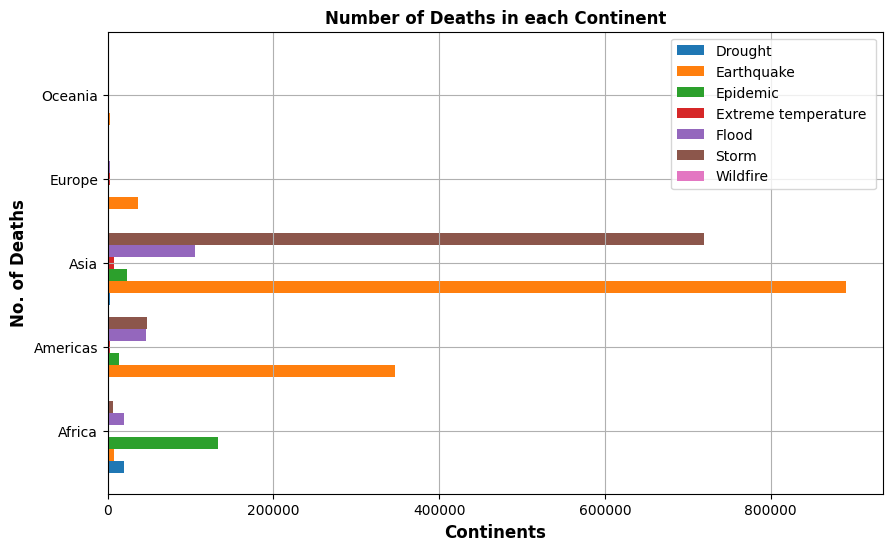

In [17]:
#data preparation for plot using a pivot table
df = dis.pivot_table(index = 'Continent',
               columns = 'Disaster Type',
               values = 'Total Deaths',
               aggfunc = 'sum') 
#plotting the bar plot
df.plot(kind = 'barh', width = 1.0, figsize=(10, 6))
plt.xlabel('Continents', fontsize=12, fontweight='bold')
plt.ylabel('No. of Deaths', fontsize=12, fontweight='bold')
plt.title('Number of Deaths in each Continent', loc = 'center', fontsize=12, fontweight='bold')
plt.grid()
plt.legend()
plt.show()

INFERENCE: 

This bar plot concludes that the continent of 'Asia' has seen the most number of deaths due to natural disasters as compared to other continents. Australia, here Oceania, has the least number of deaths. In Asia, 'Earthquake' is the main reason behind the most number of deaths, around 900k losses of human life, followed by 'Storms' that have caused around 700k deaths. Third highest hazard is faced by 'America', due to 'Eartquakes' with around 380k deaths. We can also see that 'Africa' has the most number of deaths (160k) due to 'Epidemics'. As a preventive measure, researchers and hazard officers can be on lookout for seismic activities and other geological disturbances, especially in more prome areas like the continent of Asia and America, for example, building more Eathquake-resistent shelters in prone areas. While measures that can control Epidemics like sanitation, lifestyle, ifrastructure, proper disposal of waste can be worked upon in prone areas of Africa.

### 2. Line Plot

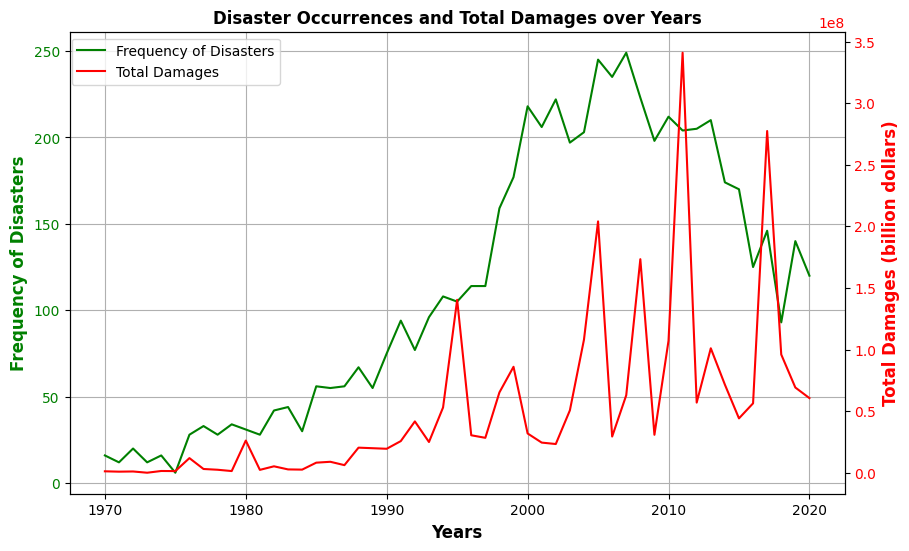

In [18]:
# Data preparation
df1 = dis.groupby('Year')['Disaster Type'].count()
x1 = df1.index
y1 = df1.values
df2 = dis.groupby('Year')['Total Damages'].sum()
x2 = df2.index
y2 = df2.values

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the frequency of disasters
ax1.plot(x1, y1, color='green', label='Frequency of Disasters')
ax1.set_xlabel('Years', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency of Disasters', color='green', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='green')

# Adding the second y-axis for total damages
ax2 = ax1.twinx()
ax2.plot(x2, y2, color='red', label='Total Damages')
ax2.set_ylabel('Total Damages (billion dollars)', color='red', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Disaster Occurrences and Total Damages over Years', fontsize=12, fontweight='bold')
ax1.grid()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88))
plt.show()


INFERENCE: 
1. The green plot concludes that the the frequency of disasters has increased over the years, with the 2000-2010 decade seemingly experiencing the most incidents over other decades. This hugely emphasizes that the hazards are increasing with passage of time, these disasters can also be a result of unnecessary human interventions to nature's balance. Studies can be made regarding the incidents that occurred from 2000-2010, to get an insight of the reasons behind the disasters and whether or whether not any human interventions directly or indirectly affected or caused these disasters. All unneccessary human activites can thus then be prevented. 
2. The red plot line concludes that the damages peaked during mid '90s, mid '00s, early and late '10s. Research can be conducted further regarding the different disasters during the hike years which caused immense damages.

### 3. Stem PLot

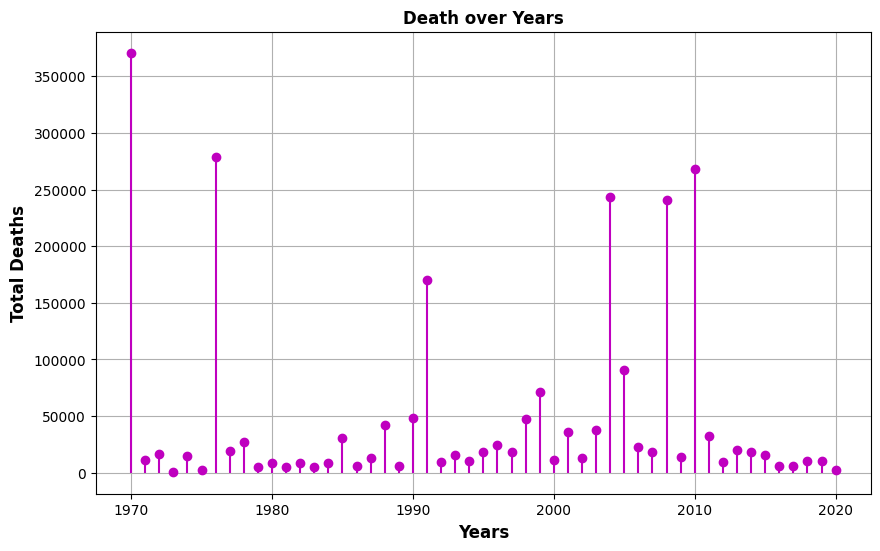

In [19]:
#data preparation by groupy() function
df = dis.groupby('Year')['Total Deaths'].sum()
x = df.index
y = df.values
#plotting the plot
plt.figure(figsize=(10, 6))
plt.stem(x,y, orientation = 'vertical', linefmt='m-', markerfmt='mo', basefmt=' ')
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=12, fontweight='bold')
plt.title('Death over Years', fontsize=12, fontweight='bold')
plt.grid()
plt.show()

INFERENCE: 

This stem plot shows that the number of deaths were more in the 70s and 80s as compared to the later decades. The high mortality rates can be seen in these specific years - 1970, 1976, 1991, 2004, 2008, 2010. The incidents that happened during these years can be studied and reasons for huge number of deaths can be assessed, thus giving Humanitarian Associations a chance to prepare for less human deaths if any such future incidents were to occur. The most common reasons for more deaths in 70s and 80s could be unavailabilty of proper medical facilities, less medical expertise, low community preparedness, less number of tools for geophysical, meteorological, hydrological, climatological, biological anomaly predictions, lack of disaster-resistant infrastructure, etc. However, the huge difference between less frequency of incidents and high death ratio in recent years should be evaluated.

### 4. Area/Stack Plot

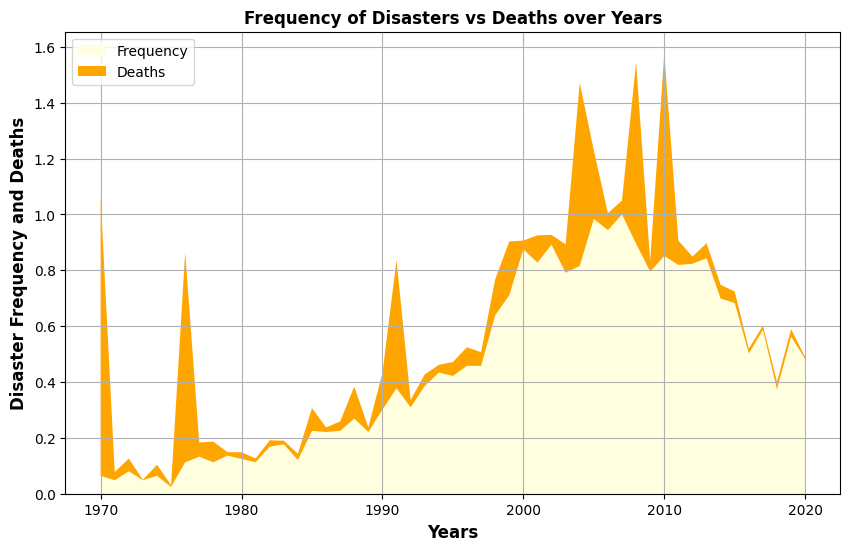

In [20]:
#data preparation busing goupby() function
df = dis.groupby('Year').agg({'Disaster Type': 'count', 'Total Deaths': 'sum'}) 
x = df.index
y1 = df['Disaster Type']
y2 = df['Total Deaths']
#normalization of data
area1 = y1 / y1.max()
area2 = y2 / y2.max()
l = ['Frequency', 'Deaths']
#plotting the plot
plt.figure(figsize=(10, 6))
plt.stackplot(x, area1, area2, labels = l, colors = ['lightyellow', 'orange'])
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Disaster Frequency and Deaths', fontsize=12, fontweight='bold')
plt.title('Frequency of Disasters vs Deaths over Years', fontsize=12, fontweight='bold')
plt.legend(loc = 2)
plt.grid()
plt.show()

INFERENCE: 

The area plot concludes that no matter the frequency of disasters, the death ratio has always been equal to or greater than the frequency. It can be seen that during a few years, though the number of incidents were less, the death rate was drastically high, that is, lesser number of disasters caused high ratio of death. Further studies can be done on the disasters during these years and hazard notices can be issued for the disasters that are deemeed to take too many lives and cause more damages. Apart from that, analysis can be done on how disasters were managed, if there were any shortcomings in disaster management, etc., and proper countermeasures can be taken.

### 5. Pie Plot

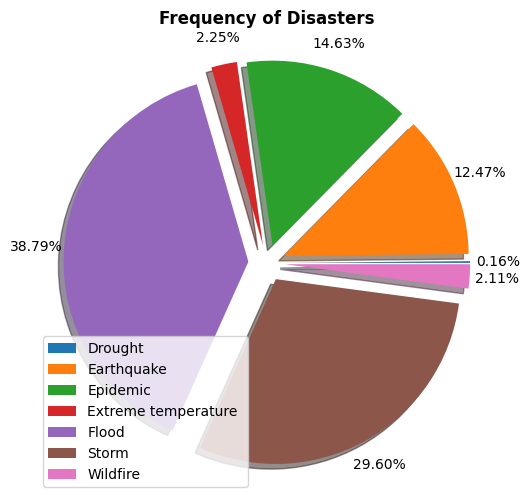

In [21]:
#data preparation by using groupby() function
df = dis.groupby('Disaster Type').size()
x = df.index
y = df.values
ex = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
#plotting the chart
plt.figure(figsize=(6, 6))
plt.pie(y, autopct = '%0.2f%%', pctdistance = 1.15, explode = ex, shadow = True)
plt.legend(x, loc = 3)
plt.title('Frequency of Disasters', fontsize=12, fontweight='bold')
plt.show()

INFERENCE: 

The pie plot concludes that 'Flood' is the most common natural disaster contributing to 38.79% of disasters that happen, followed by 'Storm' for about 29.6% of the disasters. The next most disasters that occur are 'Earthquakes' and 'Epidemics.' This indicates that incidents mostly occur around water bodies (for floods and storms, as well as earthquakes), then in tectonic plates (for earthquakes), followed by land and forests (for Epidemics and Wildfires). Droughts occur less, however, referring to Bar Plot, droughts have mostly affected regions of Africa. Accordingly, the development of infrastructure around the world can be focused around stable high grounds to have a chance against floods, storms, and tsunamis caused by eathquakes; earthquake-proof shelters and residences can be built in major metropolitan areas; governments and private sectors can considerably invest in sanitation and proper sewage facilities for future developments.

### 6. Pair Plot/Scatter Plot (Condensed)

<Figure size 1000x600 with 0 Axes>

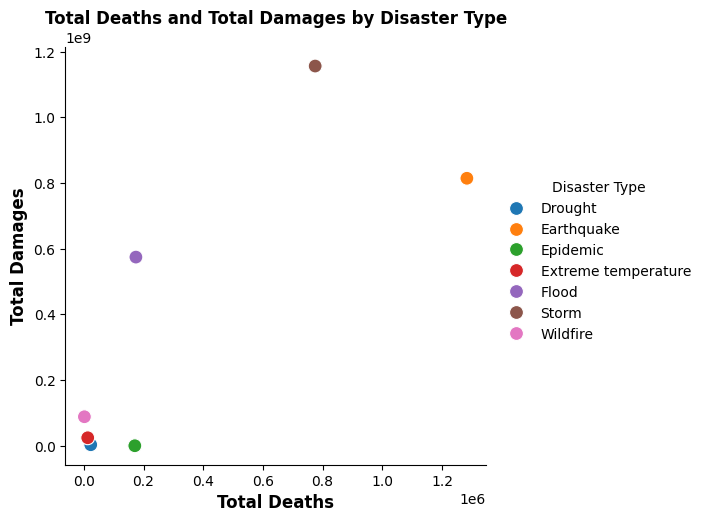

In [22]:
#data preparation by using groupby() function
count = dis.groupby('Disaster Type').agg({'Total Deaths': 'sum', 'Total Damages': 'sum'})
count = count.reset_index()
#plotting the plot
plt.figure(figsize=(10, 6))
sns.pairplot(count, 
             x_vars = ['Total Deaths'], y_vars = ['Total Damages'],
             hue = 'Disaster Type',
             markers='o', diag_kind='auto', height=5,
             plot_kws={'s': 100})
plt.title('Total Deaths and Total Damages by Disaster Type', fontsize=12, fontweight='bold')
plt.xlabel('Total Deaths', fontsize=12, fontweight='bold')
plt.ylabel('Total Damages', fontsize=12, fontweight='bold')
plt.show()

INFERENCE: 

This scatter plot concludes that the most damages are caused by 'Storms' and a considerable mid amount of deaths. Highest number of deaths are caused by 'Earthquakes' with more than mid amount of damages. Floods have caused more damages than deaths. Epidemics cause more deaths than damages, Wildfires cause more damages than deaths, while Droughts and Extreme Temperatures cause equal amount of deaths and damages. From this inference, disaster prone areas can acoordingly focus on death control or damage control measures. Example, eathquake-prone areas can focus on bulilding quake-shelters and focus on creating routes that facilitate easy human translocation. Storm and flood prone areas can consider relocating away from water-bodies to higher altitudes for preventing extensive damages.

### 7. Heatmap

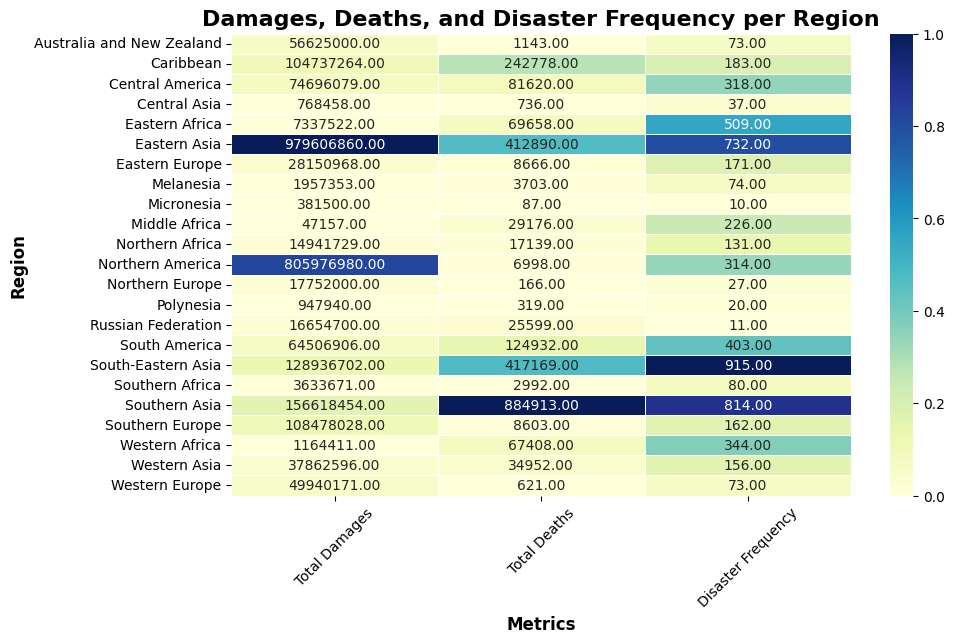

In [26]:
#data preparation of required columns
data = dis.groupby('Region').agg({
    'Total Damages': 'sum',
    'Total Deaths': 'sum',
    'Disaster Type': 'count'  # Assuming 'Disaster Type' is the column for frequency
}).reset_index()
data.columns = ['Region','Total Damages', 'Total Deaths', 'Disaster Frequency']
data = data.set_index('Region')
df = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))    #normalization xn = x-xmin/xmax-xmin
#plotting the heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=data, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title("Damages, Deaths, and Disaster Frequency per Region", fontsize=16, fontweight='bold')
plt.xlabel("Metrics", fontsize=12, fontweight='bold')
plt.ylabel("Region", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

INFERENCE: 
1. This heat map concludes that the region of 'Eastern Asia' faced most damages around 979 million dollars, facing around 732 disasters (thirdmost) and 4 lakh (thirdmost) deaths. However, the region of 'Northern America' is not far behind on damages with 805 million dollars, but it has faced comparatively lesser number of disasters (314) and deaths (6998). This shows that though North America faced less number of disasters, those disasters were either extremely damaging or that the regions of North America were expensively developed causing more damages even by few disasters. The rest of the regions have faced damages within a range of 200 million dollars.
2. The region of 'Southern  Asia' has seen the most number of deaths (8 lakhs), while facing 814 disasters (secondmost), while the region of 'South-Eastern Asia' has faced most number of disasters (915) with around 4 lakh deaths (secondmost).
3. This concludes that the regions facing the most number of disasters have seen more human damages (deaths) than materialistic damages (ranges within 200 mil $), except Southern Asia (faced equally huge human and materialistic damages).
   

### 8. Stacked Bar Plot

<Figure size 1000x600 with 0 Axes>

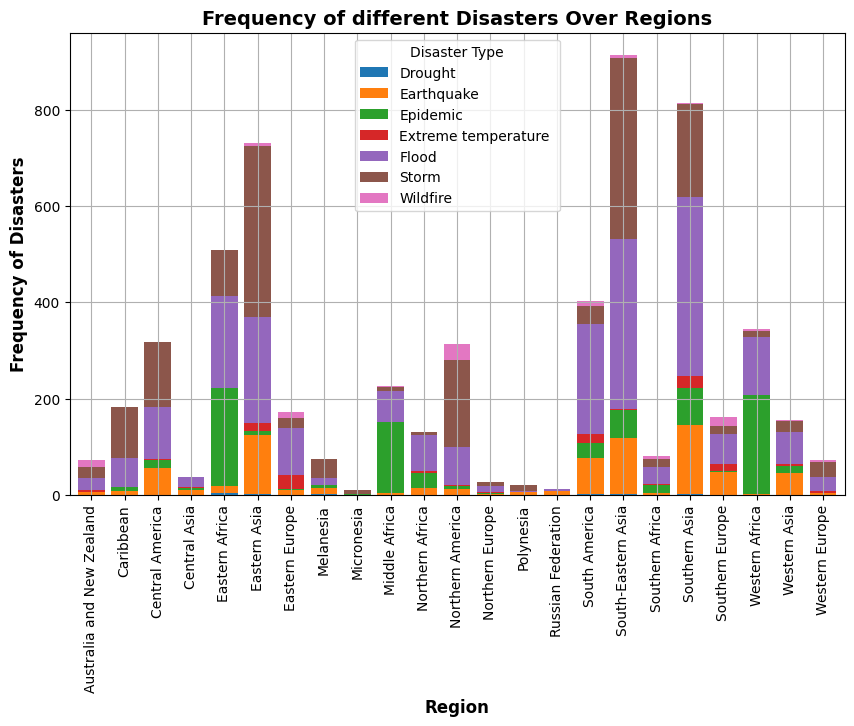

In [25]:
#data preparation by using groupby() function
df = dis.groupby(['Region', 'Disaster Type']).size().unstack().fillna(0)
#plotting the plot
plt.figure(figsize=(10, 6))
df.plot(kind='bar', width = 0.8, stacked=True, figsize=(10, 6))
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Frequency of Disasters', fontsize=12, fontweight='bold')
plt.title('Frequency of different Disasters Over Regions', fontsize=14, fontweight='bold')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.show()

INFERENCE:

This graph shows that 'South-Eastern Asia' has faced the most number of incidents, due to Storms and Floods. Followed by 'Southern Asia' and 'Eastern Asia' respectively. This map also helps us understand which disasters each region faces, and their frequency. Studies can be done to undersand the topological difference, seismic disturbances, tectonic faults, etc., in high disaster-prone areas (and low disaster prone areas, for comparison) to document scientific anomalies and facts that cause disasters and thereby plan countermeasures.

## Conclusion:
### This concludes our project where we have seen the impacts of different disasters and how they affect regions differently. We were able to analyze damages and deaths caused by different natural disasters, as well as analyze which regions are prone to what kind of disasters. This study can be used by Disaster Management Associations to get a chance to predict, prepare, prevent (3 P's) disasters, thereby saving human lives and their builds. 
## Outcome:
## 3 P's : PREDICT | PREPARE | PREVENT

# -------------------------------------- FIN ------------------------------------